In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng = zip(lats, lngs)
lat_lng
coordinates = list(lat_lng)

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
URL = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval   
---------------------------


In [7]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = URL + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. skipping...")
        pass
# Indicate that Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | yithion
City not found. skipping...
Processing Record 3 of Set 1 | kijang
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | saint-francois
Processing Record 6 of Set 1 | saleaula
City not found. skipping...
Processing Record 7 of Set 1 | kahului
Processing Record 8 of Set 1 | kavaratti
Processing Record 9 of Set 1 | paredon
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | sorland
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | namatanai
Processing Record 19 of Set 1 | banda aceh
Processing Record 20 of Set 1 | marcona
City not found. skipping...
Processing Record 21 of Set 1 | mildura
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set 1 |

Processing Record 40 of Set 4 | zeya
Processing Record 41 of Set 4 | piacabucu
Processing Record 42 of Set 4 | sakakah
Processing Record 43 of Set 4 | kapoeta
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | howard springs
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | frontera
Processing Record 48 of Set 4 | vilhena
Processing Record 49 of Set 4 | port hedland
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | leshukonskoye
Processing Record 2 of Set 5 | tela
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | synya
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | arlit
Processing Record 7 of Set 5 | ayagoz
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | esso
Processing Record 10 of Set 5 | swift current
Processing Record 11 of Set 5 | evensk
Processing Record 12 of Set 5 | riyadh
Processing Record 13 of Set 5 | gat
Processing Record 14 of Set 5 | belyy yar
Pro

Processing Record 34 of Set 8 | lianran
Processing Record 35 of Set 8 | chumikan
Processing Record 36 of Set 8 | sitka
Processing Record 37 of Set 8 | chake chake
Processing Record 38 of Set 8 | yelizovo
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | nanortalik
Processing Record 41 of Set 8 | kupang
Processing Record 42 of Set 8 | ust-kamchatsk
City not found. skipping...
Processing Record 43 of Set 8 | mahebourg
Processing Record 44 of Set 8 | kamina
Processing Record 45 of Set 8 | icod de los vinos
Processing Record 46 of Set 8 | nyurba
Processing Record 47 of Set 8 | valley
Processing Record 48 of Set 8 | pervomayskaya
Processing Record 49 of Set 8 | otta
Processing Record 50 of Set 8 | kharitonovo
Processing Record 1 of Set 9 | roma
Processing Record 2 of Set 9 | paamiut
Processing Record 3 of Set 9 | bruntal
Processing Record 4 of Set 9 | rio grande
Processing Record 5 of Set 9 | mehriz
Processing Record 6 of Set 9 | hokitika
Processing Record 7 of Se

Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | palana
Processing Record 21 of Set 12 | mariahu
Processing Record 22 of Set 12 | sinkat
City not found. skipping...
Processing Record 23 of Set 12 | chagda
City not found. skipping...
Processing Record 24 of Set 12 | teyateyaneng
Processing Record 25 of Set 12 | santa isabel do rio negro
Processing Record 26 of Set 12 | fare
Processing Record 27 of Set 12 | felanitx
Processing Record 28 of Set 12 | deer lake
Processing Record 29 of Set 12 | martapura
Processing Record 30 of Set 12 | inhambane
Processing Record 31 of Set 12 | juneau
Processing Record 32 of Set 12 | krasnoselkup
Processing Record 33 of Set 12 | khor
Processing Record 34 of Set 12 | nizhneyansk
City not found. skipping...
Processing Record 35 of Set 12 | sataua
City not found. skipping...
Processing Record 36 of Set 12 | karaul
City not found. skipping...
Processing Record 37 of Set 12 | kuldur
Processing Record 38 of Set 12 | punta de bombon
Proce

In [8]:
len(city_data)

570

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,39.36,99,100,4.07,GL,2022-10-01 16:09:04
1,Kijang,35.2442,129.2139,70.48,57,57,2.37,KR,2022-10-01 16:09:06
2,Kaitangata,-46.2817,169.8464,36.21,93,11,3.78,NZ,2022-10-01 16:09:06
3,Saint-Francois,46.4154,3.9054,67.44,73,100,13.80,FR,2022-10-01 16:09:07
4,Kahului,20.8947,-156.4700,78.84,73,20,7.00,US,2022-10-01 16:09:08
5,Kavaratti,10.5669,72.6420,81.70,77,100,16.08,IN,2022-10-01 16:09:09
6,Paredon,16.0333,-93.8667,83.43,54,22,10.42,MX,2022-10-01 16:09:10
7,Kodiak,57.7900,-152.4072,35.11,93,100,5.75,US,2022-10-01 16:09:10
8,Vaini,-21.2000,-175.2000,73.56,78,40,9.22,TO,2022-10-01 16:09:11
9,Namibe,-15.1961,12.1522,68.86,80,24,9.78,AO,2022-10-01 16:09:11


In [10]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

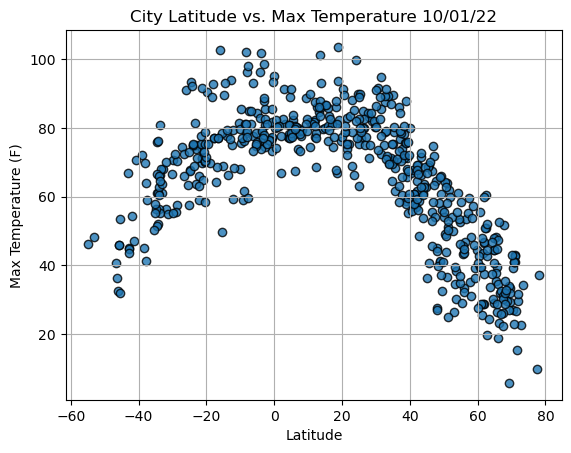

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

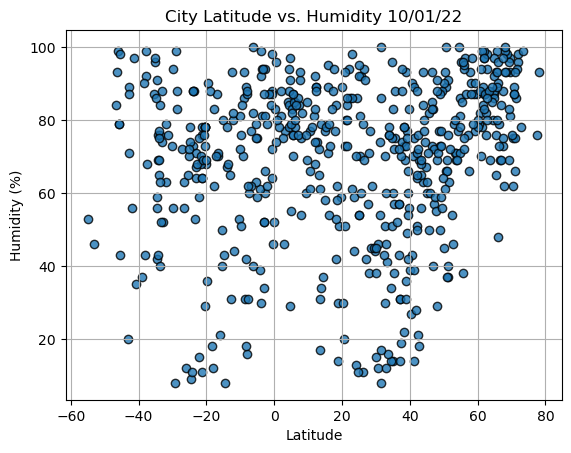

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

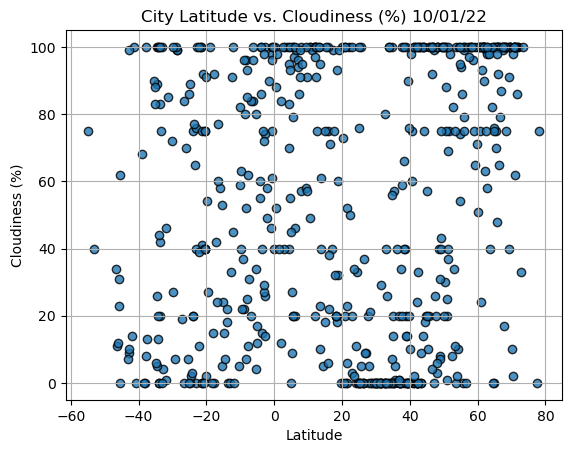

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show Plot
plt.show()

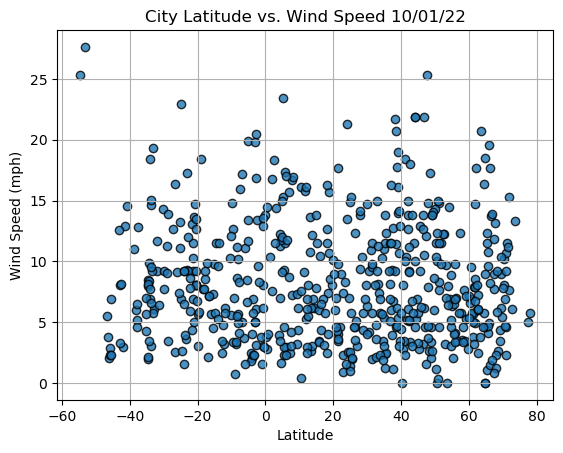

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show Plot
plt.show()

In [17]:
#Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_values, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                      Sorland
Country                        NO
Date          2022-10-01 16:07:28
Lat                        67.667
lng                       12.6934
Max Temp                    51.66
Humidity                       62
Cloudiness                     17
Wind Speed                  13.18
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
565     True
566     True
567    False
568     True
569    False
Name: Lat, Length: 570, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-10-01 16:09:04,65.6145,-37.6368,39.36,99,100,4.07
1,Kijang,KR,2022-10-01 16:09:06,35.2442,129.2139,70.48,57,57,2.37
3,Saint-Francois,FR,2022-10-01 16:09:07,46.4154,3.9054,67.44,73,100,13.80
4,Kahului,US,2022-10-01 16:09:08,20.8947,-156.4700,78.84,73,20,7.00
5,Kavaratti,IN,2022-10-01 16:09:09,10.5669,72.6420,81.70,77,100,16.08


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

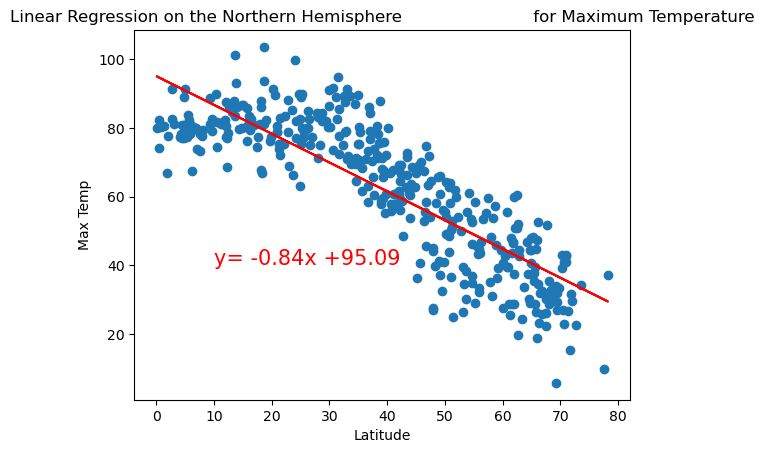

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

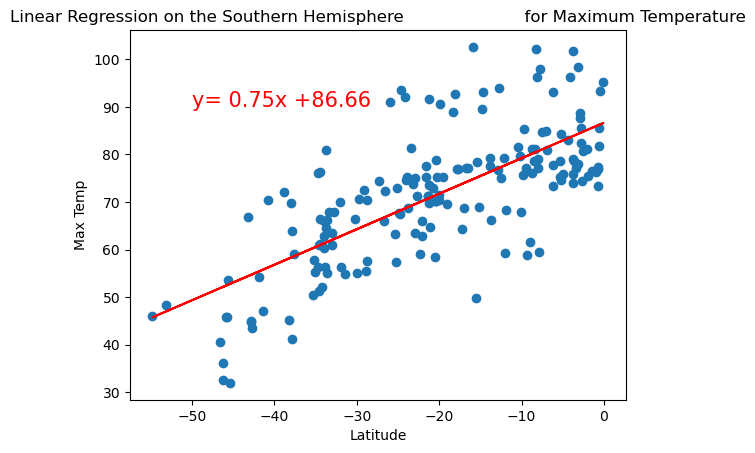

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-50,90))

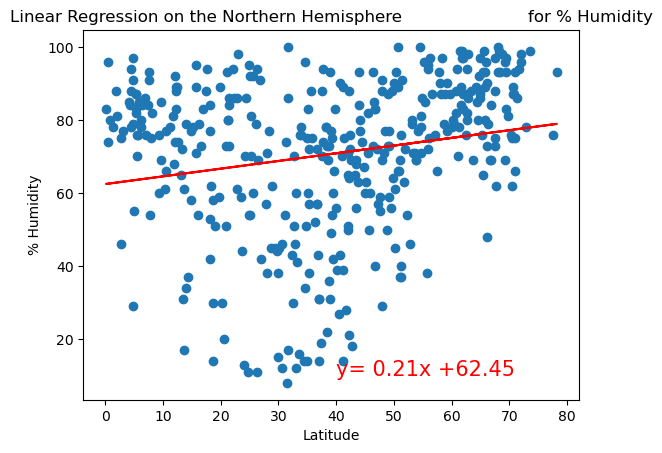

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Humidity', '% Humidity', (40,10))

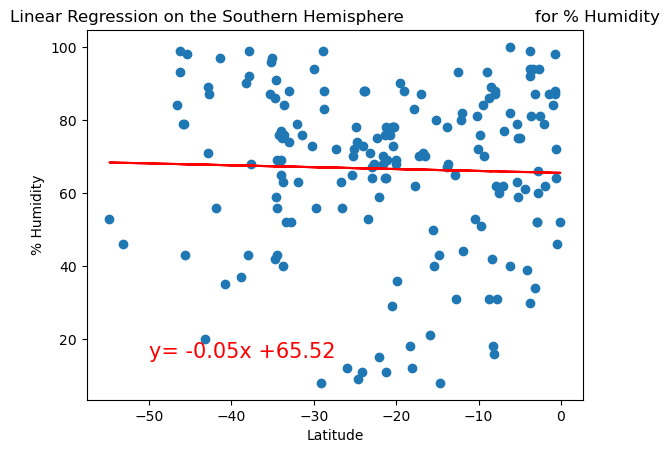

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

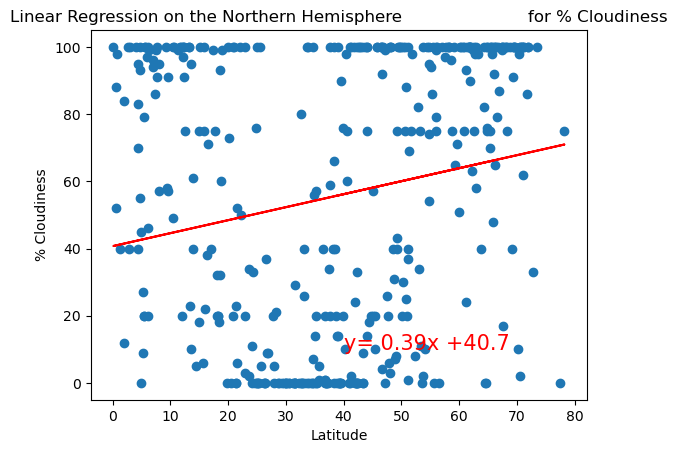

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness', (40,10))

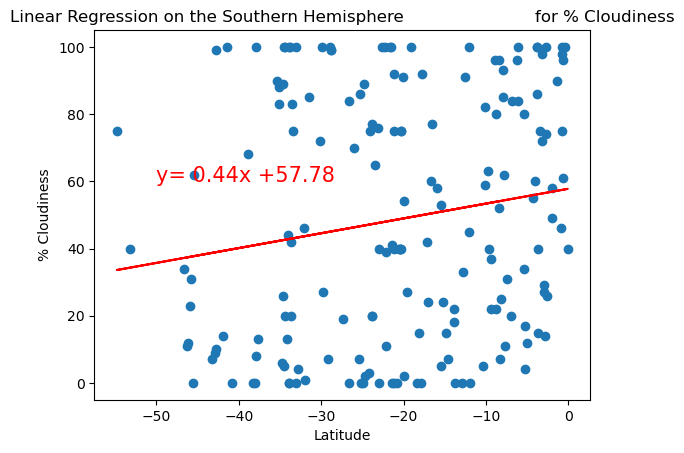

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

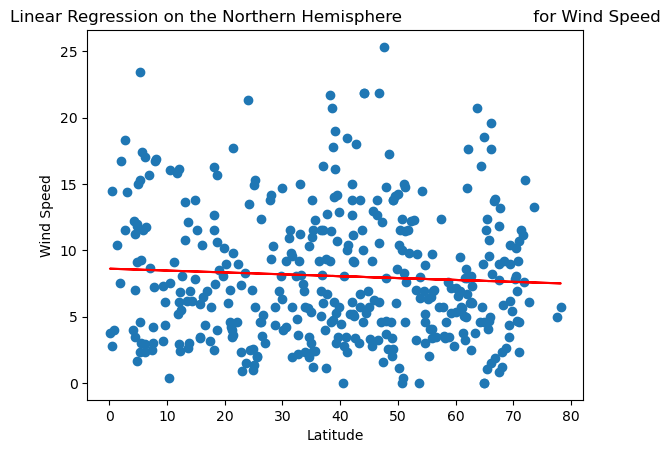

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

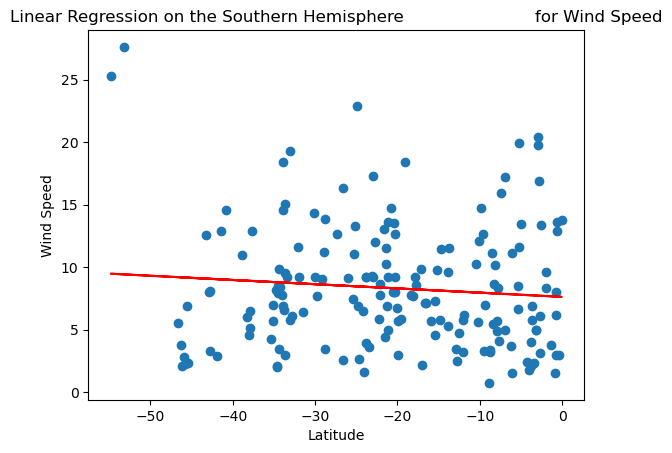

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))